<a href="https://colab.research.google.com/github/SiddhanthNB/shop-customers/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will be analysing dataset `Customers.csv` which contains customers as observations visiting to the shop, each observation has Satisfaction and Loyalty scores. 

Where Satisfaction is the review given by the customer on the scale of 10.
And Loyalty is the metric caluclated using several factors like frequency of purchases from the mall, no. of visits to the mall, no. of feedbacks given etc.

#### Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Dataset

In [2]:
data = pd.read_csv("Customers.csv")
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


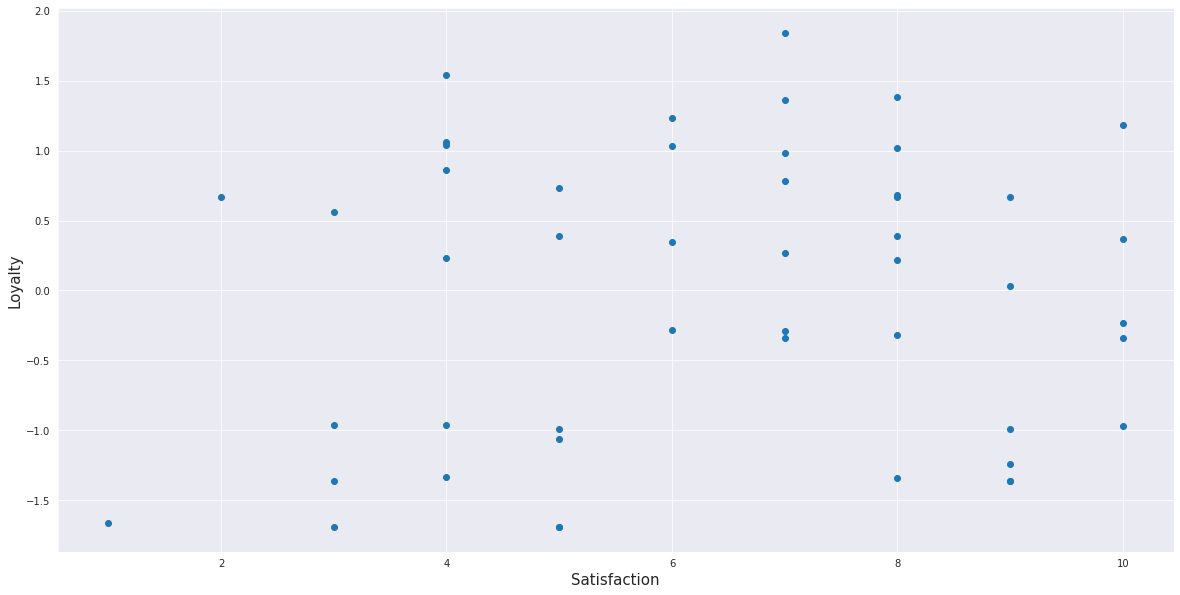

In [3]:
plt.figure(figsize=(20,10))
plt.scatter(data["Satisfaction"], data["Loyalty"])
plt.ylabel("Loyalty", fontsize=15)
plt.xlabel("Satisfaction", fontsize=15)
plt.show()

As we can see, our datapoints are widespread all over the plot. Hence grouping them manually is quite impossible.

Let's use K-Means and Agglomerative clustering to help us solve the problem.

#### Feature Scaling

In [4]:
df = data.copy()

In [5]:
from sklearn import preprocessing
X = preprocessing.scale(df)

## K-Means Clustering

#### Finding the optimal No. of Clusters

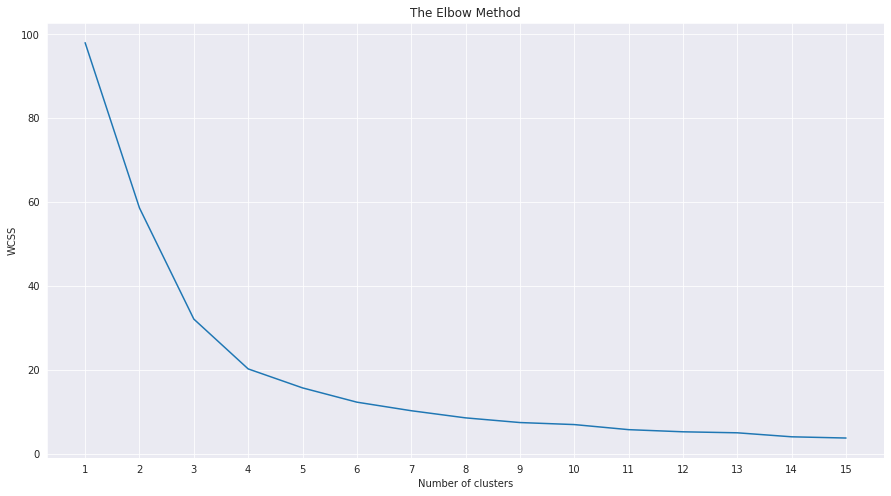

In [6]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1, 16), wcss)
plt.xticks(range(1,16))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see that the curve is taking a sharp shift at x=4 and x=5, so i will be taking no. of clusters to be 4.

#### Clustering

In [7]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [8]:
k_clustered_data = data.copy()
k_clustered_data['Clusters'] = y_kmeans
k_clustered_data.head()

,Satisfaction,Loyalty,Clusters
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,0


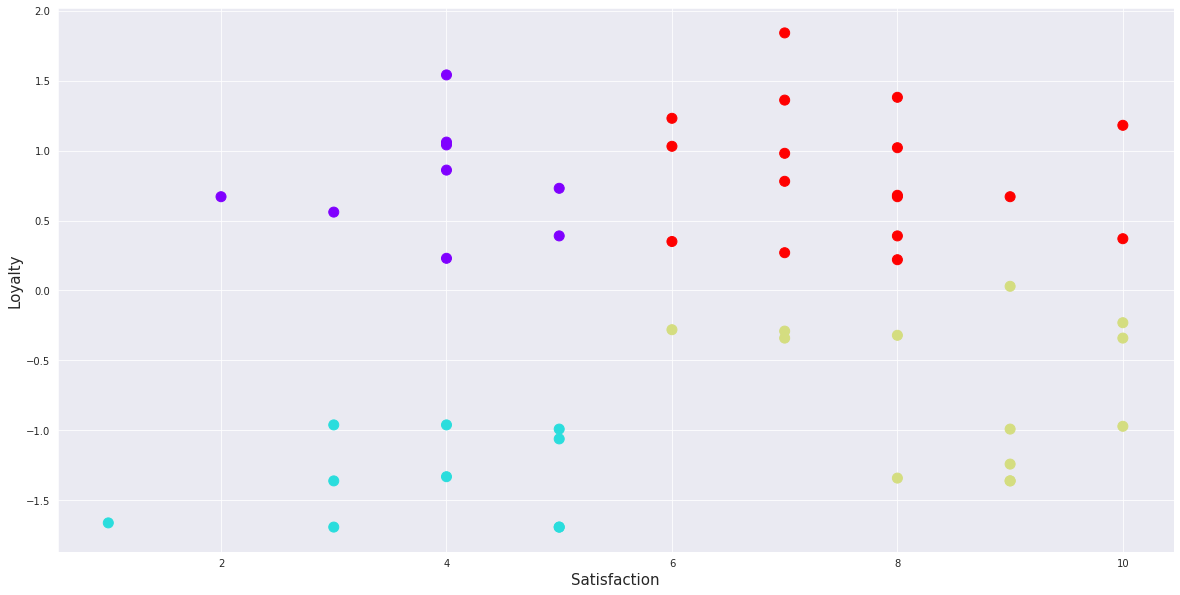

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(k_clustered_data["Satisfaction"], k_clustered_data["Loyalty"], c= k_clustered_data['Clusters'], s=100, cmap='rainbow')
plt.ylabel("Loyalty", fontsize=15)
plt.xlabel("Satisfaction", fontsize=15)
plt.show()

## Agglomerative Clustering

#### Dendrogram for N value.

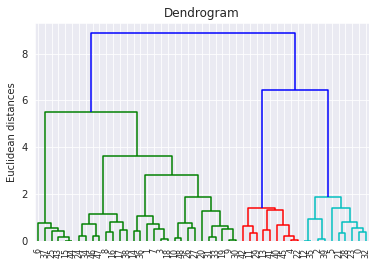

In [10]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

From above graph, we use n_clusters = 4 

#### Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([1, 0, 1, 0, 2, 1, 3, 0, 0, 0, 0, 2, 1, 2, 0, 3, 0, 0, 0, 0, 0, 1,
       2, 1, 0, 3, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 3, 0, 1, 2, 2, 2, 3,
       3, 2, 0, 0, 0])

In [12]:
hc_clustered_data = data.copy()
hc_clustered_data['Clusters'] = y_hc
hc_clustered_data.head()

,Satisfaction,Loyalty,Clusters
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2


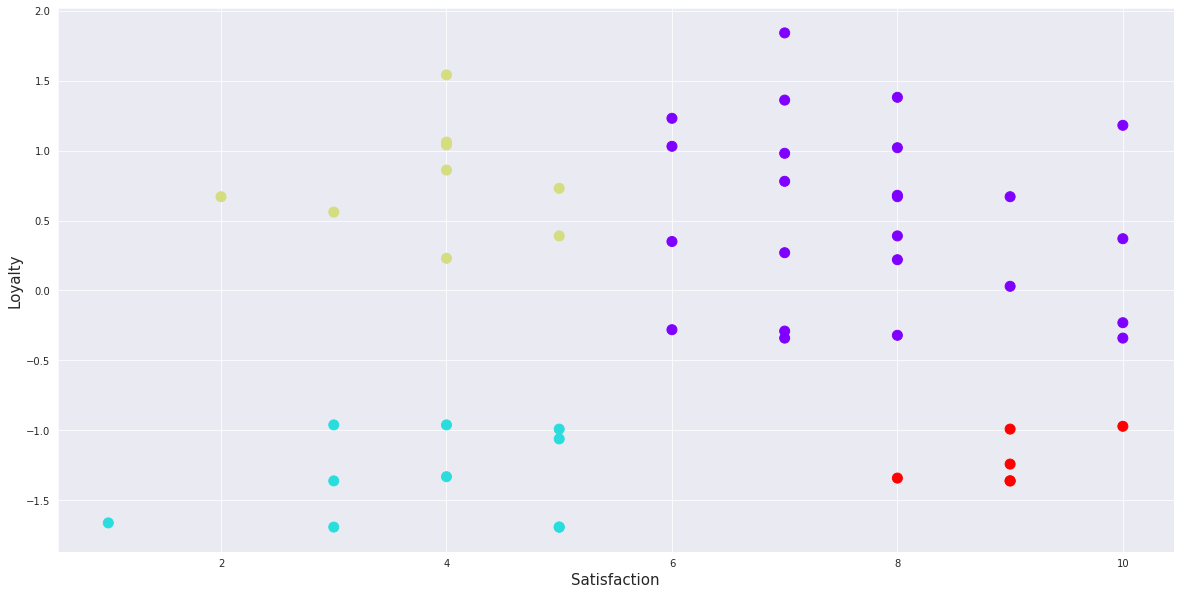

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(hc_clustered_data["Satisfaction"], hc_clustered_data["Loyalty"], c= hc_clustered_data['Clusters'], s=100, cmap='rainbow')
plt.ylabel("Loyalty", fontsize=15)
plt.xlabel("Satisfaction", fontsize=15)
plt.show()

## Comapring K-Means and Agglomerative Clustering

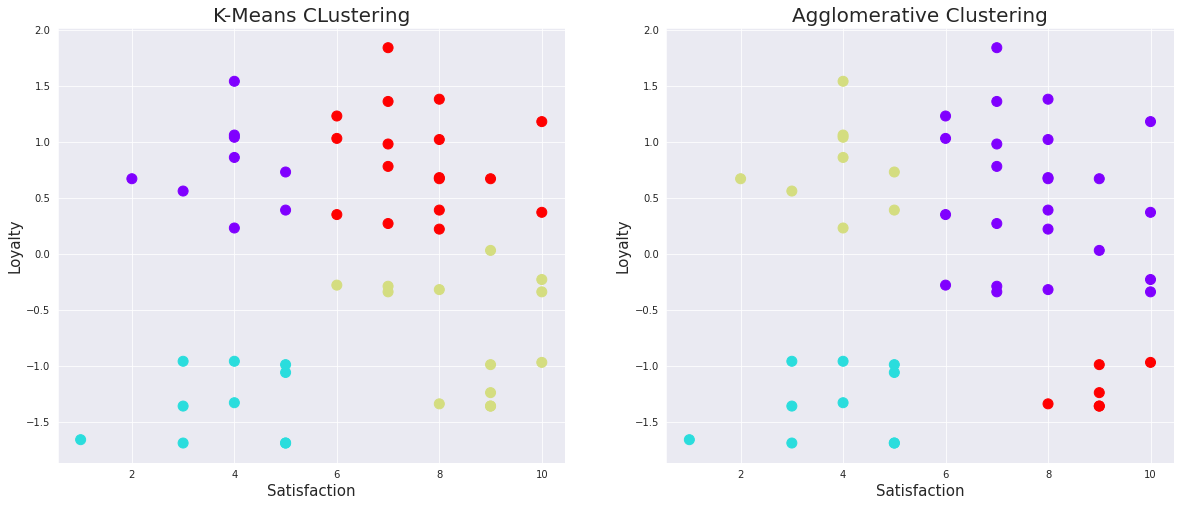

In [14]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(k_clustered_data["Satisfaction"], k_clustered_data["Loyalty"], c= k_clustered_data['Clusters'], s=100, cmap='rainbow')
plt.title('K-Means CLustering', fontsize = 20)
plt.ylabel("Loyalty", fontsize=15)
plt.xlabel("Satisfaction", fontsize=15)


plt.subplot(1, 2, 2)
plt.scatter(hc_clustered_data["Satisfaction"], hc_clustered_data["Loyalty"], c= hc_clustered_data['Clusters'], s=100, cmap='rainbow')
plt.title('Agglomerative Clustering', fontsize = 20)
plt.ylabel("Loyalty", fontsize=15)
plt.xlabel("Satisfaction", fontsize=15)

plt.show()

## Insights:

By observing the above obtained clustering results, we can divide the customers into 5 differents groups with following characteristics:

*    ***FANS***: Customers with high loyalty and satisfaction.

*   ***ROAMERS***: Customers with low loyalty and high satisfaction.

*    ***SUPPORTERS***: Customers with high loyalty and low satisfaction.

*   ***ALIENATED***: Customers with have low loyalty and satisfaction.



